# Fourier Transform Project
## By Nico Rowland


### Background: 
#### I took Physics 89: Introduction to Mathmatical Physics over the summer. One of the subjects that really stood out to me was how Fourier Transforms could determine coefficients for a Fourier Series. After reaching out to the professor, we decided that a good way for me to get some intuitive knowledge on how it works would be to try and model it myself using Python!
#### The intent of this project is to display a Fourier Series evolving over time through animation. I was unable to find a way to make a Fourier transformation from a given function, so I decided to use the Fourier Series of the "Shark Tooth" function that I solved for in one of the problem sets.

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FFMpegWriter
import numpy as np
plt.style.use("ggplot")

Defining animation writer (Credit to the Astro Python DeCal for helping me debug this)

In [2]:
metadata = dict(title='Fourier', artist='NicoRowland')
writer = FFMpegWriter(fps=12, metadata=metadata,bitrate=20000)
fig = plt.figure(dpi=200)

<Figure size 1280x960 with 0 Axes>

In [65]:
# Shark Tooth Fourier Transform (Simply a cosine function, the sine components have a coefficient of zero)
def Fourier (x, k):
    y = 0
    for n in range (1,k):
        b = 2 / (np.pi*(2*n-1))
        L = 4
        yNew = b*np.sin(np.pi*(2*n-1)*x / L)
        y = y + yNew
    return y

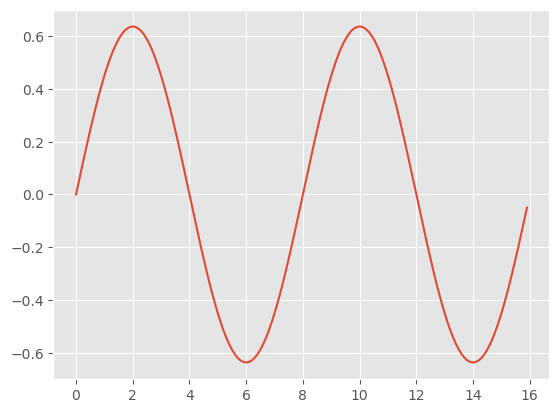

In [66]:
time = np.arange(1, 100, 1)
fig, ax = plt.subplots()
#open up the writer
with writer.saving(fig, 'Fourier.mp4', dpi = 200):
    #run thru the time array that will update your x and y coords with a for loop

    for i in range(1, len(time)):
        #clear the figure
        ax.clear()
        
        #define your coordinates at the time we are at in the for loop

        x = np.arange(0,16,0.1)
        y = Fourier(x, time[i])
        ax.plot(x, y)
        
        #last three lines of code, draw the figure, pause the figure, grab the frame
        plt.pause(.01)
        writer.grab_frame()

## Results:
#### This is a good barebones animation, but I still think it could use some fine tuning. One thing that I didn't like was how each nth iteration in the Fourier Series was parsed evenly. 

#### To improve the visualization, I want to add a weight class that places more 'emphasis' (time in the animation) on the lower numbers than the higher ones. To accomplish this, I decided to make a weight class for each number in the series. The weight should correspond to a deccelerating function where the minimum framerate should be 1 per iteration until I hit the maximum inputted

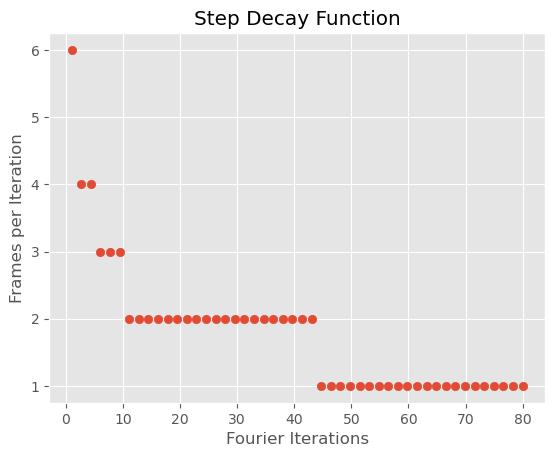

In [93]:
# Make a function that can map the nth iteration (x) to the line weighting (y)
def step_decay (x):
    y = 12* (x+2)**-(5/6) + 1
    return np.round(y)
x_test = np.linspace(1,80,48)
plt.figure()
plt.scatter(x_test, step_decay(x_test))
plt.xlabel("Fourier Iterations")
plt.ylabel("Frames per Iteration")
plt.title("Step Decay Function")
plt.show()

### This looks good! Now I'm going to use this data to make a new time array with the weighting from the function, then apply this to the animation

In [100]:
# Create an array for iterations 1 to 48 with the frame weighting
time_w = [] # weighted time
for i in range (1,42):
    i = i+1
    weight = int(step_decay(i))
    for j in range (0,weight):
        time_w.append(i)
# hold the last frame for a bit
for i in range(1,13):
    time_w = np.append(time_w,time_w[-1])
type(time_w[0])

numpy.int32

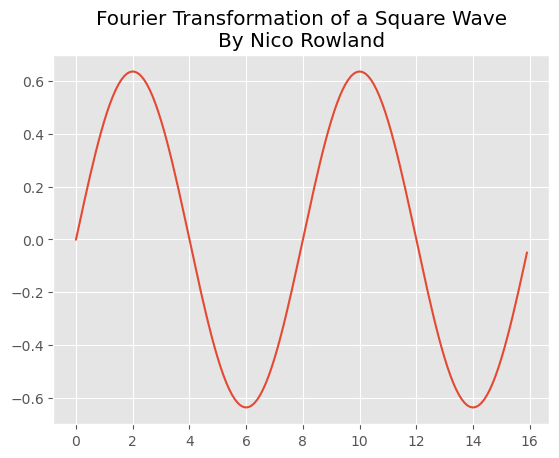

In [106]:
# Apply the new weighted time array to the animator
fig, ax = plt.subplots()
#open up the writer
with writer.saving(fig, 'FourierWeight.mp4', dpi = 200):
    #run thru the time array that will update your x and y coords with a for loop

    for i in range(1, len(time_w)):
        #clear the figure
        ax.clear()
        
        #define your coordinates at the time we are at in the for loop

        x = np.arange(0,16,0.1)
        y = Fourier(x, time_w[i])
        ax.plot(x, y)
        ax.set_title("Fourier Transformation of a Square Wave\nBy Nico Rowland")
        
        #last three lines of code, draw the figure, pause the figure, grab the frame
        plt.pause(.01)
        writer.grab_frame()